In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!cp '/content/drive/MyDrive/Cough_Covid19/public_dataset_wav.zip' '/content/'

In [ ]:
#!unzip public_dataset_wav.zip

In [1]:
#!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torch-stft

In [1]:
import os 
from multiprocessing import Pool
import torch
from torch_stft import STFT
import numpy as np
import librosa 
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.multiprocessing as mp
import time, glob

In [2]:
!ls

 2020_11_23_visualize_coswara_data_metadata.ipynb
 birdclef-mels-computer-public.ipynb
 birds-call-identification-online-0-58.ipynb
 clean-fast-simple-bird-identifier-training-colab.ipynb
 eda-cnn-and-transfer-learning.ipynb
 FILE_20210604_175327_cough_covid-1-Copy1.ipynb
 FILE_20210604_175327_cough_covid-1.ipynb
 Inference_5_class.ipynb
 Inference_finetuned.ipynb
 Inference.ipynb
'make & split folders.ipynb'
 pytorch-training-birdclef2021.ipynb
 wav2stft.py


# webm2wav

In [ ]:
list_file = os.listdir('/Downloads/Covid/Cough/data/public_dataset')
list_webm = []
for fname in list_file:
    if fname[-4:] == 'webm': #.ogg; .mp3
        list_webm.append(fname)

In [ ]:
def webm2wav(fname):
    name = fname.split('.webm')[0]
    #name = fname.split('.ogg')[0]
    #name = fname.split('.mp3')[0]

    os.system(f'ffmpeg -i /Downloads/Covid/Cough/data/public_dataset/{fname} -c:a pcm_f32le /Downloads/Covid/Cough/data/wav/{name}.wav')
    print(name)

In [ ]:
with Pool(24) as p:
    p.map(webm2wav, list_webm)

# wav2mel

In [49]:
%matplotlib notebook
!ls
#!cd

 2020_11_23_visualize_coswara_data_metadata.ipynb
 birdclef-mels-computer-public.ipynb
 birds-call-identification-online-0-58.ipynb
 clean-fast-simple-bird-identifier-training-colab.ipynb
 eda-cnn-and-transfer-learning.ipynb
 FILE_20210604_175327_cough_covid-1-Copy1.ipynb
 FILE_20210604_175327_cough_covid-1.ipynb
 Inference_5_class.ipynb
 Inference_finetuned.ipynb
 Inference.ipynb
'make & split folders.ipynb'
 pytorch-training-birdclef2021.ipynb
 wav2stft.py


In [30]:
import threading

device = torch.device("cuda")
filter_length = 1024
hop_length = 256
win_length = 1024 
window = 'hann'
stft = STFT(
    filter_length=filter_length, 
    hop_length=hop_length, 
    win_length=win_length,
    window=window
).to(device)


def wav2mel(fname):
    basename = fname.split('.')[0]
    #audio = librosa.load(os.path.join('/home/linh/Downloads/Covid/cough/wav',fname))[0]
    audio = librosa.load(os.path.join('/home/linh/Downloads/Covid/Cough/coswara/audio/',fname))[0]
    audio = torch.FloatTensor(audio)
    audio = audio.unsqueeze(0)
    audio = audio.to(device)
    magnitude, phase = stft.transform(audio)
    plt.imshow(20*np.log10(1+magnitude[0].cpu().data.numpy()), aspect='auto', origin='lower')
    plt.axis('off')
    plt.savefig(f'/{basename}.jpg', bbox_inches='tight', pad_inches = 0)
    
#list_wav = os.listdir('/home/linh/Downloads/Covid/Cough/coswara/audio/')

#for idx in tqdm(range(len(list_wav))):
#    wav2mel(list_wav[idx])

In [31]:
#ist_wav = os.listdir('/home/linh/Downloads/Covid/Cough/coswara/audio/')
list_wav = glob.glob('/home/linh/Downloads/Covid/Cough/coswara/audio/*/*/*.wav')

  0%|          | 53/15568 [01:24<6:51:47,  1.59s/it] 


ValueError: Input signal length=0 is too small to resample from 44100->22050

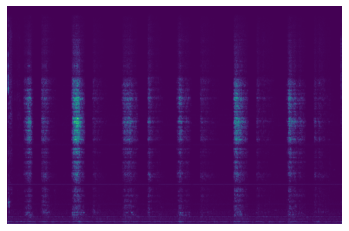

In [32]:
for idx in tqdm(range(len(list_wav))):
    wav2mel(list_wav[idx])

# Convert from *npy to *png

In [ ]:
from tqdm import tqdm
import threading
from multiprocessing import Pool


#filelist = glob.glob('/Downloads/Covid/Cough/public_dataset_mel/STFT/*.npy')
filelist = os.listdir('/Downloads/Covid/Cough/public_dataset_mel/STFT/')
def npy2jpg(fname):
    basename = fname.split('.')[0]
    file = np.load(os.path.join('/Downloads/Covid/Cough/public_dataset_mel/STFT/',fname))
    plt.imshow(file, aspect='auto', origin='lower'
              )
    plt.axis('off')
    plt.savefig(f"/Downloads/Covid/Cough/JPG/{basename}.png",  bbox_inches='tight', pad_inches = 0)
    
#for idx in tqdm(range(len(filelist))):
#    npy2jpg(filelist[idx])

with Pool(20) as p:
    p.map(npy2jpg, filelist)

In [ ]:
import matplotlib.pyplot as plt
from multiprocessing import Pool
import librosa 
import librosa.display
import os


def wav2mel_mfcc(fname):
    basename = fname.split('.')[0]
    y, sr = librosa.load(os.path.join('/content/wav',fname))
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    img = librosa.display.specshow(feature)
    plt.savefig(f"/content/jpg_mfcc/{basename}.png",  bbox_inches='tight', pad_inches = 0)

list_wav = os.listdir('/content/wav')

with Pool(5) as p:
    p.map(wav2mel_mfcc, list_wav)

# Rename

In [3]:
path = "/home/linh/Downloads/Covid/Cough/coswara/"
files = glob.glob('/home/linh/Downloads/Covid/Cough/coswara/audio/*/*/*.wav')
for index, file in enumerate(files):
    #print (file)
    os.rename(path+file, path + str(index)+ '.wav')

FileNotFoundError: [Errno 2] No such file or directory: '/home/linh/Downloads/Covid/Cough/coswara//home/linh/Downloads/Covid/Cough/coswara/audio/20200502/gjF0L8phdmPxc9az1muox66bQD93/cough-heavy.wav' -> '/home/linh/Downloads/Covid/Cough/coswara/0.wav'

# Move files

In [33]:
import os, shutil, glob

#Source file 
sourcefile = '/home/linh/Downloads/Covid/Cough/coswara/audio/'

# for loop then I split the names of the image then making new folder 
#for file_path in glob.glob(os.path.join(sourcefile, '*.wav*')):
for file_path in glob.glob('/home/linh/Downloads/Covid/Cough/coswara/audio/*/*/*.wav'):


    new_dir = '/home/linh/Downloads/Covid/Cough/X/' #file_path.rsplit('.', 1)[0]    
    # If folder does not exist try making new one
    #try:
    #    os.mkdir(os.path.join(sourcefile, new_dir))
    # except error then pass
    #except WindowsError:
    #    pass
    # Move the images from file to new folder based on image name
    #shutil.move(file_path, os.path.join(new_dir, os.path.basename(file_path)))
    shutil.copy(file_path, os.path.join(new_dir, os.path.basename(file_path)))

In [27]:
import os
import shutil

root_src_dir = os.path.join('/home/linh/Downloads/Covid/Cough/coswara/audio',"/*", "/*", "/*.wav")
root_target_dir = os.path.join('/home/linh/Downloads/Covid-19/Cough/X')

operation = 'move' #'copy' or 'move'

for src_dir, dirs, files in os.walk(root_src_dir):
    dst_dir = src_dir.replace(root_src_dir, root_target_dir)
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    for file_ in files:
        src_file = os.path.join(src_dir, file_)
        dst_file = os.path.join(dst_dir, file_)
        if os.path.exists(dst_file):
            os.remove(dst_file)
        if operation == 'copy':
            shutil.copy(src_file, dst_dir)
        elif operation == 'move':
            shutil.move(src_file, dst_dir)

# Make Folders

In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
import glob


labels = pd.read_csv('/Downloads/Covid/Cough/metadata_compiled.csv')




train_dir = os.path.join('/Downloads/Covid/Cough/JPG/')

train_sep_dir = os.path.join('/Downloads/Covid/Cough/dat/')


if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

for uuid, status in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(train_sep_dir + status):
        os.mkdir(train_sep_dir + status)
    src_path = train_dir + uuid + '.png'
    dst_path = train_sep_dir + status + '/' + uuid + '.png'
    try:
        shutil.copy(src_path, dst_path)
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

# Split Folders

In [4]:
!pip install split-folders
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/home/linh/Downloads/OCTID/d/", output="/home/linh/Downloads/OCTID/", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("input_folder", output="output", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values



Copying files: 0 files [00:29, ? files/s]


Copying files: 585 files [00:00, 4587.51 files/s]
